# Proyecto Final de Física Computacional 

## Preparar un notebook con la siguiente información 

 

1. Descripción del fenómeno_30% 

2. Códigos de programación con sus respectivos comentarios_30%  

3. Mostrar gráficos que describan el comportamiento del fenómeno en estudio_30% 

4. Animación donde se muestre la evolución del sistema con alguna variable (Temperatura, tiempo, campo eléctrico, etc) o en el caso de proyectos con análisis de datos mostrar animación de comparación entre los datos sin tratar y los datos tratados _10 % 

 

La presentación será de 20 minutos usando su notebook (No es necesario preparar PowerPoint)  

Serán dos días de presentación, el 8 y 13 de junio de 2022 

Los proyectos se subirán a github y también al Teams 


Problema:
Juan Cedeño - ICA (independent component analysis), si es posible aplicar en datos propios.

# 1. Descripción del fenómeno_30% 

Nuestra suposición fundamental sobre ICA es que las señales son Estadísticamente independientes entre sí y Una distribución no gaussiana En esta publicación, tomaremos dos fuentes de audio (archivos .wav) grabadas de forma independiente y las mezclaremos linealmente para crear una señal mixta. Luego, las señales mixtas se introducen en nuestro algoritmo de implementación ICA personalizado (sin bibliotecas, solo numpy) para separarlas. La idea es construir la implementación de ICA de forma incremental junto con la intuición matemática que hemos explorado aquí.


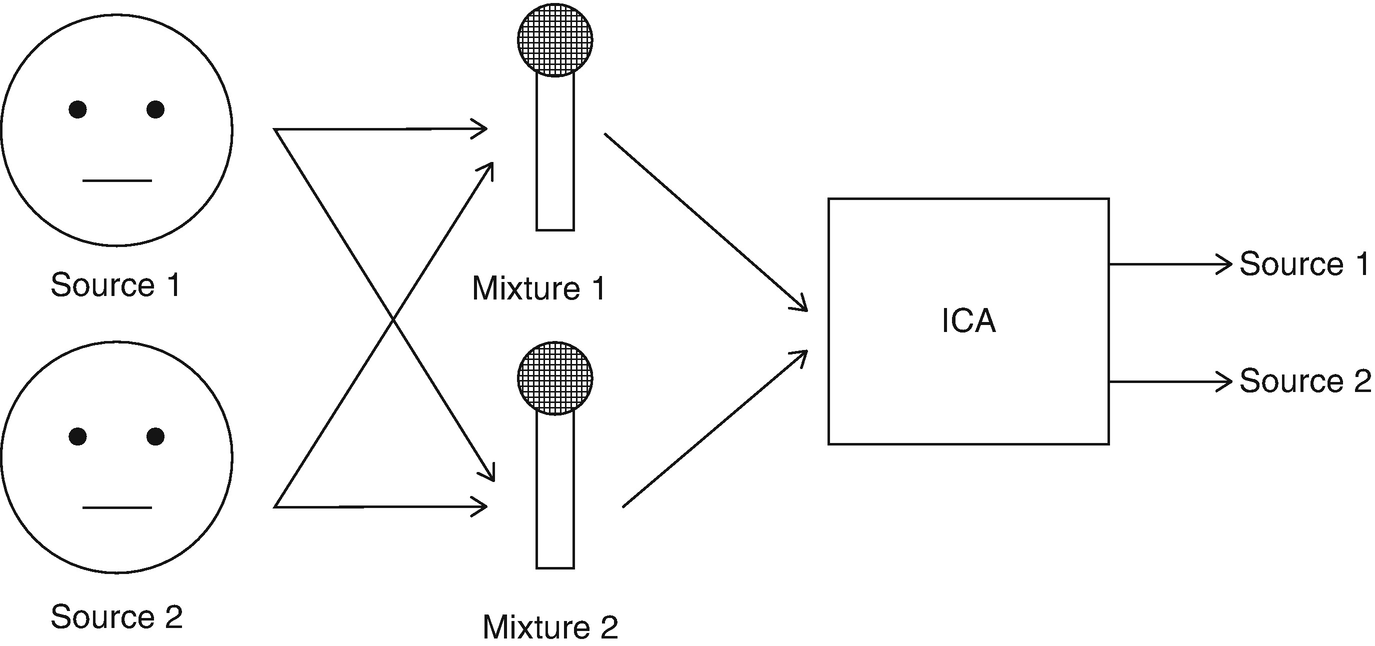

In [72]:
from IPython import display
display.Image("https://media.springernature.com/original/springer-static/image/prt%3A978-1-4939-7131-2%2F9/MediaObjects/978-1-4939-7131-2_9_Part_Fig1-147_HTML.png")

El análisis de componentes independientes (ICA) extrae variables estadísticamente independientes de un conjunto de variables medidas, donde cada variable medida se ve afectada por una serie de causas físicas subyacentes. La extracción de dichas variables es deseable porque las variables independientes suelen generarse mediante diferentes procesos físicos. Por lo tanto, al extraer variables independientes, ICA puede extraer efectivamente las causas físicas subyacentes para un conjunto dado de variables medidas.

# Ejemplo de ICA desde numpy para entender mejor el tipo de análisis que se realiza.

# Paso 1:
## Preparando los datos que se van a combinar.

In [73]:
import IPython.display as ipd  # Se importa la libreria IPython.display para cargar archivos .wav

# En este caso se cargarán 2 archivos, cocomono y Carro de verduras.
# Los archivos que se van a caergar deben ser monofonocios, esto será explicado más adelante.
s1_file = "./talk.wav"      # Carga el archivo de audio monofonocio cocomono y lo guarda en la variable s1_file .
#s1_file = "./talk.wav" #  CocoMono , MonoUruguay vs Ghana  Minuto Final (1)
s2_file = "./music.wav"   # Carga el archivo de audio monofonocio Carro de verduras y lo guarda en la variable s2_file .
#s2_file = ".//music.wav"

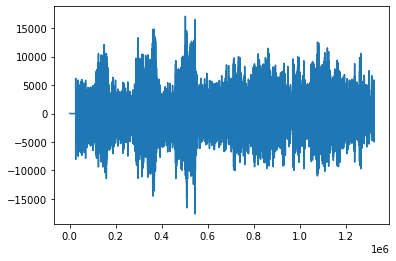

In [74]:
import numpy as np
import scipy.io.wavfile as waves
import matplotlib.pyplot as plt
fsonido, sonido = waves.read(s2_file)
plt.plot(sonido)

In [75]:
ipd.Audio(s1_file)   # Carga el archicvo s1_file para poder escucharlo y verificar que se a cargado correctamente

In [76]:
ipd.Audio(s2_file) # Carga el archicvo s2_file para poder escucharlo y verificar que se a cargado correctamente

# Paso 2: 
## Se iniciara a combinar los archivos de audio. Para la combinación de los archivos primero se deben abrir los archivos wav monofonicos (son mas simples y se transformar a arreglos de datos de 1 dimensión).
Para combianar los archivos de audio wav se hace una combinación lineal:

$X=As$

Dónde, 
$X_1(t) , X_2(t),X_3(t),⋯,X_n(t)$

donde t es el tiempo de muestreo, $A$ es una matriz cuadrada invertible desconocida que mezcla los componentes de las fuentes
$s = s_1(t) , s_2 (t) , s_3 (t ),⋯, s_n (t) $ son las fuentes linealmente independientes.

Las mezcla de las componetes se hace en función de una sola variable por esto es que se necesita que los archivos de audio sean monofonicos.

El objetivo ICA es identificar una aproximación de la matriz $A$.

In [77]:
import numpy as np    
np.random.seed(0)   # Crea un archivo semilla aleatorio

from scipy.io import wavfile as wf #se importa para abrir archivos wav como datos con los que se pueda trabajar

def mix_sources(sources, apply_noise=False):  # se define una funcion mix_source para generar una combinación lineal sin ruido.
    for i in range(len(sources)):  # inicia un for desde i hasta el tamaño de la fuente.
        max_val = np.max(sources[i]) #la función max_val indica el valor máximo de las fuentes
        if(max_val > 1 or np.min(sources[i]) < 1): # el valor de la fuente debe ser mayor a 1 o menor a 1 pero no puede ser cero
            sources[i] = sources[i] / (max_val / 2) - 0.5  # se hace una autoiteracion de datos donde se reemplaza los datos de las fuentes por un nuveo valor  sources[i] / (max_val / 2) - 0.5
            
    mixture = np.c_[[source for source in sources]]  # la función mixture mezca los datos de la fuente con la funcion fuentes. Esto se hace con el comando np.c
    
    if(apply_noise):  # Se genera un ruido artificial para la combinación lineal de los datos. 
        mixture += 0.02 * np.random.normal(size=X.shape)
        
    return mixture


In [78]:
# se leen los archivos de audio wav
_, s1 = wf.read(s1_file)  

sampling_rate, s2 = wf.read(s2_file)

#Se que los datos sean monofonicos, es decir, de 1 dimensión. 
#Si el archivo es estereo mostrará mas de 1 columna de datos. 
#Por lo que no se podra realizar la combinación lineal de datos de forma simplificada.

print("Hay que revisar que los datos sean con el mismo orden de magnitud para que no haya problemas con las combinacionbiacioón lineal de datos",s1.shape)
print("Muestra el tamaño de los datos del audio 1 monofonico",s1.shape)
print("Muestra el tamaño de los datos del audio 1 monofonico",s2.shape)

#Como los datos cumplen con la condición: tener le mismo orden de magnitud de datos y de 1- dimensión, 
#entonces se puede continuar trabajando

Hay que revisar que los datos sean con el mismo orden de magnitud para que no haya problemas con las combinacionbiacioón lineal de datos (220568,)
Muestra el tamaño de los datos del audio 1 monofonico (220568,)
Muestra el tamaño de los datos del audio 1 monofonico (1323000,)


In [79]:
# se crea la variable x para combinar los datos de audios.
x = mix_sources([s1, s2[:s1.shape[0]]], False) #el tamaño de los datos del audio 2 se iguala al audio 1. 

print(f'Tamaño del audio 1: {s1.shape}, Tamaño del audio 2: {s1.shape}, Tamaño de la combinación: {x.shape}')

# Se muestra que los datos deben de tener el mismo tamaño. Y que al combianarse los datos wav de 1-dimensión
# Da como resultado un archivo de 2- dimensiones.

wf.write('./combinación.wav', sampling_rate, x.mean(axis=0).astype(np.float32)) 
# se guardan la combinación lineal de los datos con nombre: combinación.wav
# Los datos son guardados como tipo float32 bits.

Tamaño del audio 1: (220568,), Tamaño del audio 2: (220568,), Tamaño de la combinación: (2, 220568)


# Paso 3: 
## Normalización de datos

Para normalizar los datos se toman los datos y se les restas el promedio:

$X_{Normalizada} = X-X_{Promedio}$


En el programa se verá se determina $X_{Promedio}$ con el comando: $x = np.array(x)$


In [80]:
def center(x):   # se inicia la normalizacion de los datos x
    x = np.array(x) 
    return x - x.mean(axis=1, keepdims=True)


## Blanqueamiento de datos:

Es el proceso para eliminamos las correlaciones entre los componentes. 

$Cov = 0$

$Var = 1$

El proceso de blanqueamiento se realiza a través de la descomposición en valores propios de su matriz de covarianza. 
El conjunto de datos blanqueados se define como:

$X_{blanqueado} =(ED^{-1/2}E^{T})X$

Dónde:

$D$ es una matriz diagonal de valores propios, cada elemento diagonal es un valor propio de la matriz de covarianza.

$E$ es una matriz ortogonal de vectores propios.

Si se escribe el blanqueado de datos en función de V queda como:

$X_{blanqueado} =(VD^{-1/2}E^{T})X$

Donde: $V$, $D$ y $E$ son valores propios y vectores propios de la covarianza del conjunto de datos X.

$V$ es la única matriz de rotación desconocida.

La teoría de la información ayuda a resolver $W$  en función de $V$.

$I(s)=
\
\sum_{i=1}H[(XV_W)_{i}]-H[(XV_W)
\
$


La convergencia se logra actualizando el valor de $W$ al obtener el producto punto de él y su transposición aproximadamente igual a 1.

 $W^{T}_p W_{p+1} \approx 1$


$W_p = \frac{1}{2} \
\sum_{i=0}^n X_{obj}[(W^T X) \ - \frac{1}{2} \sum_{i=0}^n d_{obj}[(W^T X)W \
 $

Donde 
$X_{obj} y d_{obj}$ son las funciones objeto y su derivada




In [81]:
def whiten(x):
    eigen_values, eigen_vectors = np.linalg.eigh(np.cov(x))
    D = np.diag(eigen_values)
    sqrt_inverse_D = np.sqrt(np.linalg.inv(D))
    x_whiten = eigen_vectors @ (sqrt_inverse_D @ (eigen_vectors.T @ x))
    
    print(f'Shape of Eigen Values: {eigen_values.shape}, Eigen Vectors: {eigen_vectors.shape}, Whitened Data: {x_whiten.shape}')
    
    return x_whiten, D, eigen_vectors

X_whiten, D, E = whiten(
    center(x)
)
D, E

Shape of Eigen Values: (2,), Eigen Vectors: (2, 2), Whitened Data: (2, 220568)


(array([[0.04109109, 0.        ],
        [0.        , 0.05854404]]),
 array([[-0.99991728, -0.01286218],
        [-0.01286218,  0.99991728]]))

In [82]:
def objFunc(x):
    return np.tanh(x)

def dObjFunc(x):
    return 1 - (objFunc(x) ** 2)

def calc_w_hat(W, X):
    # Implementation of the eqn. Towards Convergence
    w_hat = (X * objFunc(W.T @ X)).mean(axis=1) - dObjFunc(W.T @ X).mean() * W
    w_hat /= np.sqrt((w_hat ** 2).sum())
    
    return w_hat

Finalmente, $W$ se inicializa a una variable aleatoria.
 $W^{T}_p W \approx 1$ es la base de la ortogonalidad e indica la convergencia.
 Una vez calculada la matriz resultante, producto escalar de ésta y el blanqueado $X_{blanqueado}$ de la señal  da la fuente.

In [83]:
def ica(X, iterations, tolerance=1e-5):
    num_components = X.shape[0]
    
    W = np.zeros((num_components, num_components), dtype=X.dtype)
    distances = {i: [] for i in range(num_components)}
    
    for i in np.arange(num_components):
        w = np.random.rand(num_components)
        for j in np.arange(iterations):
            w_new = calc_w_hat(w, X)
            if(i >= 1):
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            
            w = w_new
            if(distance < tolerance):
                print(f'Convergence attained for the {i+1}/{num_components} component.')
                print(f'Component: {i+1}/{num_components}, Step: {j}/{iterations}, Distance: {distance}\n')
            
                break;
                
            distances[i].append(distance)
            
            if(j % 50 == 0):
                print(f'Component: {i+1}/{num_components}, Step: {j}/{iterations}, Distance: {distance}')
            
            
                
        W[i, :] = w
    S = np.dot(W, X)
    
    return S, distances

S, distances = ica(X_whiten, iterations=100)
wf.write('solucion_1.wav', sampling_rate, S[0].astype(np.float32))
wf.write('solucion_2.wav', sampling_rate, S[1].astype(np.float32))

Component: 1/2, Step: 0/100, Distance: 0.10131261340015985
Convergence attained for the 1/2 component.
Component: 1/2, Step: 5/100, Distance: 5.959665953403359e-06

Component: 2/2, Step: 0/100, Distance: 0.5121420429215661
Component: 2/2, Step: 50/100, Distance: 3.7792980293160916e-05


In [84]:
combinación = 'combinación.wav'
ipd.Audio(combinación)

In [85]:
Solucion_1 = 'solucion_1.wav'
ipd.Audio(Solucion_1)

In [86]:
Solucion_2 = 'solucion_2.wav'
ipd.Audio(Solucion_2)

En resumen que es el ICA: 
En el proceso ICA. Las señales por ejemplo del cerebro y otras fuentes de ruido $s(t)$ se mezclan a través de un proceso de mezcla lineal desconocido A, lo que da como resultado las lecturas del sensor $x ( t )$ con $A s ( t )$. ICA encuentra una matriz de invierte el proceso de mezcla $W$ que mapea desde las señales del sensor hasta los componentes recuperados $s( t )$. 

<img src="The-ICA-process-Signals-from-the-brain-and-other-noise-sources-s-t-are-mixed-through.png">

# 2. Códigos de programación con sus respectivos comentarios_30% 
Problema: ICA (independent component analysis), si es posible aplicar en datos propios.


<img src="figura 1.png">

La imagen fue cargada con el comando img src="figura 1.png" en Markdown 

### Esto es un archivo propio sacado de una simulación en el programa Proteus IRIS. Los datos consisten en ondas dadas por un generador de ondas y leidas por un analizador, los datos fueron exportados desde Proteus Iris a csv.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
a=np.loadtxt(fname='OSC.txt')    # se carga el archivo txt con la información de las señales.

In [88]:
a.shape  
# Muestra el tamaño de la matriz
#son 5 columnas que representan tiempos, y las señales estudiadas

(61, 4)

In [89]:
# Se muestran los datos de cada columna por separados y se indica que información tiene cada columna
print ("\n Tiempo de la señal cuadrada: \n",a[:,0])
print ("\n Señal Cuadrada: \n",a[:,1])
print ("\n Señal diente de sierra: \n",a[:,2])
print ("\n Suma de las señales: \n \n",a[:,3])



 Tiempo de la señal cuadrada: 
 [0.000000e+00 5.000000e-06 1.789730e-04 4.950000e-04 5.050000e-04
 7.883330e-04 9.950000e-04 1.005000e-03 1.288333e-03 1.495000e-03
 1.505000e-03 1.788333e-03 1.995000e-03 2.005000e-03 2.288333e-03
 2.495000e-03 2.505000e-03 2.788333e-03 2.995000e-03 3.005000e-03
 3.288333e-03 3.495000e-03 3.505000e-03 3.788333e-03 3.995000e-03
 4.005000e-03 4.288333e-03 4.495000e-03 4.505000e-03 4.788333e-03
 4.995000e-03 5.005000e-03 5.288333e-03 5.495000e-03 5.505000e-03
 5.722067e-03 5.995000e-03 6.005000e-03 6.288333e-03 6.495000e-03
 6.505000e-03 6.788333e-03 6.995000e-03 7.005000e-03 7.288333e-03
 7.495000e-03 7.505000e-03 7.722067e-03 7.995000e-03 8.005000e-03
 8.222067e-03 8.495000e-03 8.505000e-03 8.722067e-03 8.995000e-03
 9.005000e-03 9.288333e-03 9.495000e-03 9.505000e-03 9.788333e-03
 9.995000e-03]

 Señal Cuadrada: 
 [ 0.   1.8  1.8  1.8 -1.8 -1.8 -1.8  1.8  1.8  1.8 -1.8 -1.8 -1.8  1.8
  1.8  1.8 -1.8 -1.8 -1.8  1.8  1.8  1.8 -1.8 -1.8 -1.8  1.8  1.8  1.

In [90]:
n_samples = len(a)  # el número de muestras se iguala al tamaño de datos de la matriz
time = a[:,0] # Se define el tiempo como la primera columna de la matriz de datos

s1 = a[:,1]  # Se define s1 como la primera columna de datos.
# la primera columna de datos corresponde a la amplitud de la señal cuadrada en función del tiempo
s2 = a[:,2] # Se define s1 como la primera columna de datos.
# la primera columna de datos corresponde a la amplitud de la señal diente de cierra en función del tiempo

S = np.c_[s1, s2] # Se define S como una combinación lineal de las señales s1 y s2.
#Recordar mostrar con ruido y sin ruido.
S += 0.2 * np.random.normal(size=S.shape)  # Se puede añadir ruido o no a la señal con esta linea.

S /= S.std(axis=0)  # Estandarisa la señal S
A = np.array([[0, 0], [0.5, .05], [1, 1]])  # Se define la metriz de mezcla (combinación de los datos)
# al mezclar los datos se crea una arreglo de 2 dimensiones. 

X = np.dot(S, A.T)  # Genera los datos observados X mendiante el cálculo el 
                    #producto de puntos de dos matrices de entrada.


In [91]:
from sklearn.decomposition import FastICA, PCA

# Cálculo ICA
ica = FastICA(n_components=2) # se llama la funcion FastICA y se señala que se va a descomponer en 2 señales
# El comando  FastICA(n_components=2), donde 2 es la cantidad de señales que se desean.

S_ = ica.fit_transform(X)  # Ajuste el modelo y recupere las fuentes de X.
A_ = ica.mixing_  # Se obtiene una aproximación de la matriz de mezcla.

# Se aplica ICA lamatriz de mezcla.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_) 
# La función se usa para encontrar si dos matrices son iguales en cuanto a elementos 
# dentro de una tolerancia.



3. Mostrar gráficos que describan el comportamiento del fenómeno en estudio_30%

In [92]:
from IPython.core.display import HTML # Importa core display para mantener todas las gráficas centradas.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [93]:
import numpy as np
import matplotlib.pyplot as plt

names = ["tiempo",
         "Señal real del osciloscopio: Cuadrada",
         "Señal real del osciloscopio: Diente de Sierra",
         "Señal real del osciloscopio:Suma de señales",
        ]

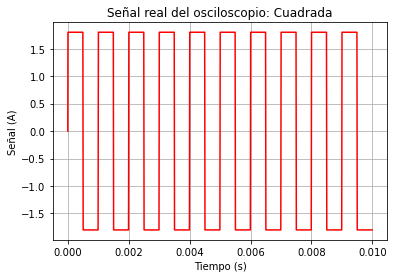

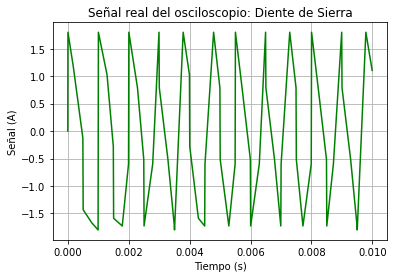

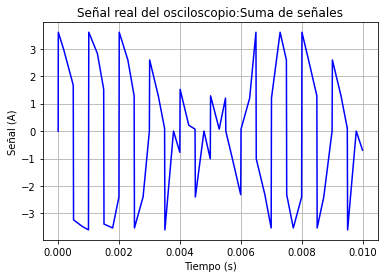

In [94]:
for i in range(1,4):
    
    Colores = ["w","r", "g", "b"]
    Modelos = a[:,0],a[:,1],a[:,2], a[:,3]
    
    plt.plot(time, Modelos[i],Colores[i])
    plt.title(names[i]) 
    plt.grid()
    plt.xlabel("Tiempo (s)")            #Etiqueta de eje x
    plt.ylabel("Señal (A)") 
    plt.savefig("Reales{}.png".format(i), dpi=200)
               #Etiqueta de eje y
    
    plt.show()

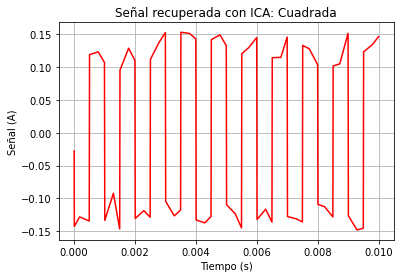

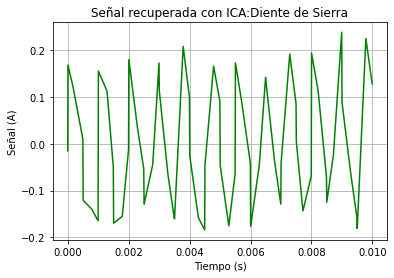

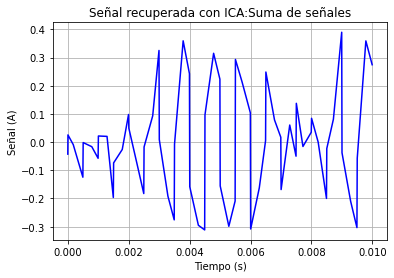

In [95]:
names_ICA = ["tiempo",                  
             "Señal recuperada con ICA: Cuadrada",
             "Señal recuperada con ICA:Diente de Sierra",
             "Señal recuperada con ICA:Suma de señales"]
Señal_Sum= S_[:,0]+S_[:,1]
Modelos_ICA = a[:,0],S_[:,1],S_[:,0],Señal_Sum
Colores_ICA = ["w","r", "g", "b"]

for i in range(1,4):



    plt.plot(time, Modelos_ICA[i],Colores_ICA[i])
    plt.title(names_ICA[i])
    plt.grid()
    plt.xlabel("Tiempo (s)")            #Etiqueta de eje x
    plt.ylabel("Señal (A)")            #Etiqueta de eje y
    plt.savefig("función-ICA {}.png".format(i), dpi=200)
    plt.show()

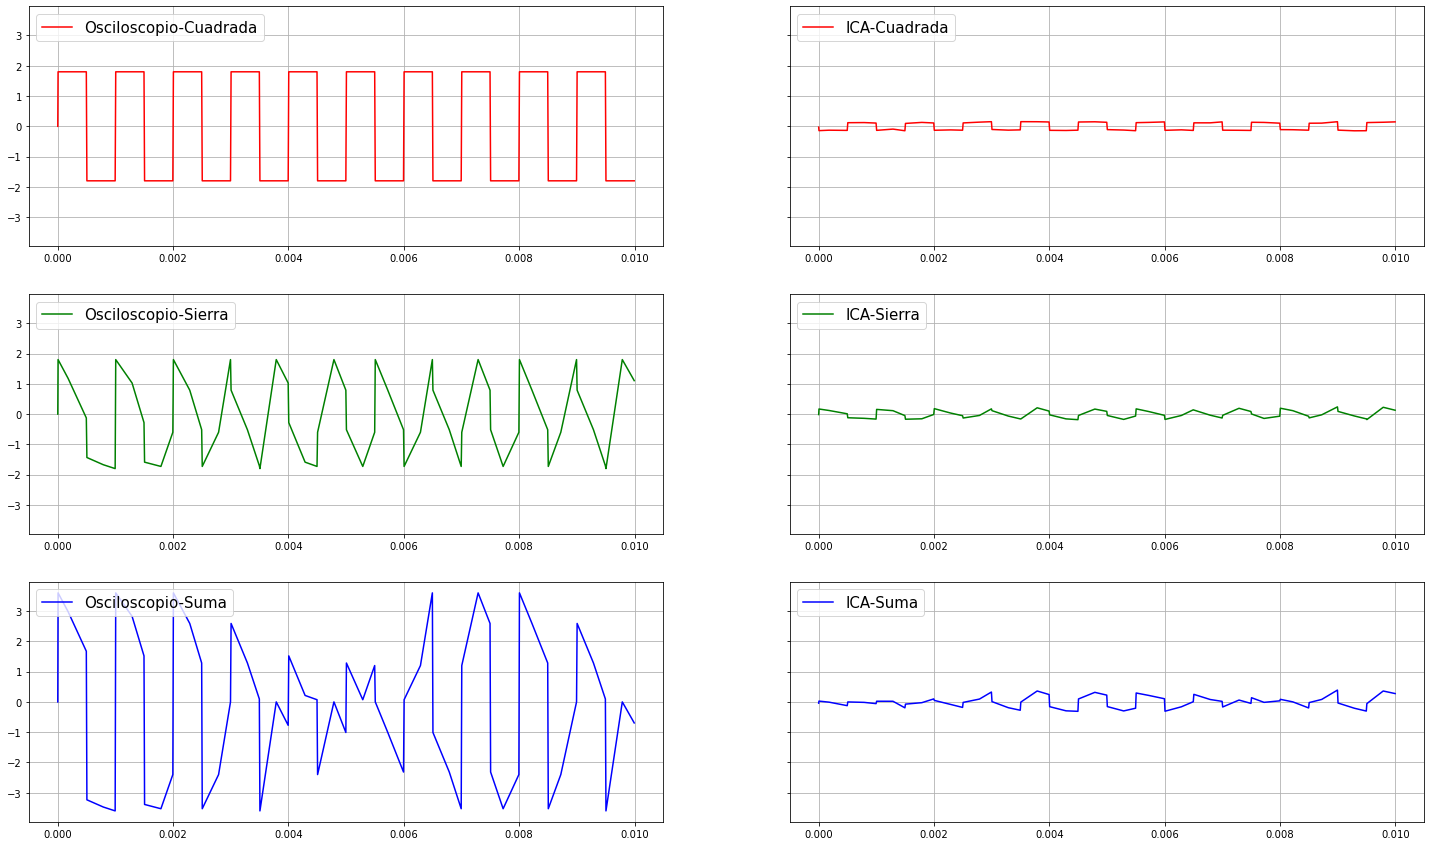

In [96]:
# Se muestran los resultados obtenuidos por el osciloscopio y el proceso ICA juntas pera mejorar la comparacion visual
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,figsize=(25,15), sharey=True)

#Gráficos mostrados por el osciloscopio 
axes[0,0].plot(a[:,0], a[:,1],"r",label=("Osciloscopio-Cuadrada"))
axes[0,0].legend()
axes[0,0].grid()
axes[0,0].legend(loc='upper left',fontsize=15)

axes[1,0].plot(a[:,0], a[:,2],"g",label=("Osciloscopio-Sierra"))
axes[1,0].legend()
axes[1,0].grid()
axes[1,0].legend(loc='upper left',fontsize=15)

axes[2,0].plot(a[:,0], a[:,3],"b",label=("Osciloscopio-Suma"))
axes[2,0].legend()
axes[2,0].grid()
axes[2,0].legend(loc='upper left',fontsize=15)
plt.savefig("Varias.png".format(i), dpi=200)

#Gráficos porcesados por ICA

axes[0,1].plot(a[:,0], S_[:,1],"r",label=("ICA-Cuadrada"))
axes[0,1].legend()
axes[0,1].grid()
axes[0,1].legend(loc='upper left',fontsize=15)

axes[1,1].plot(a[:,0], S_[:,0],"g",label=("ICA-Sierra"))
axes[1,1].legend()
axes[1,1].grid()
axes[1,1].legend(loc='upper left',fontsize=15)

axes[2,1].plot(a[:,0], S_[:,1]+ S_[:,0],"b",label=("ICA-Suma"))
axes[2,1].legend()
axes[2,1].grid()
axes[2,1].legend(loc='upper left',fontsize=15)

plt.savefig("Varias2.png".format(i), dpi=200)
plt.show()

4. Animación donde se muestre la evolución del sistema con alguna variable (Temperatura, tiempo, campo eléctrico, etc) o en el caso de proyectos con análisis de datos mostrar animación de comparación entre los datos sin tratar y los datos tratados _10 %

In [97]:
import glob
from PIL import Image

fp_in="Varias*.png"  
fp_out="animación_Varias.gif"

imgs=(Image.open(f) for f in sorted(glob.glob(fp_in)))
img=next(imgs) # se extrae la primera imagen de a iteración
img.save(fp=fp_out, format='GIF', append_images=imgs,dpi=250, save_all=True, duration=5000, loop=0)

from IPython.display import Image  #se usa para llamar archivos desde la computadra
Animación_0= Image(url='animación_Varias.gif') 

In [98]:
Animación_0

In [99]:
import glob
from PIL import Image

fp_in="Reales*.png"  
fp_out="animación_Real.gif"

imgs=(Image.open(f) for f in sorted(glob.glob(fp_in)))
img=next(imgs) # se extrae la primera imagen de a iteración
img.save(fp=fp_out, format='GIF', append_images=imgs,dpi=300, save_all=True, duration=5000, loop=0)

from IPython.display import Image  #se usa para llamar archivos desde la computadra
Animación_1= Image(url='animación_Real.gif') 

In [100]:
import glob
from PIL import Image
fp_in="función-ICA*.png"  
fp_out="animación_ICA.gif"

imgs=(Image.open(f) for f in sorted(glob.glob(fp_in)))
img=next(imgs) # se extrae la primera imagen de a iteración
img.save(fp=fp_out, format='GIF', append_images=imgs,dpi=300, save_all=True, duration=5000, loop=0)
from IPython.display import Image  #se usa para llamar archivos desde la computadra
Animación_2= Image(url='animación_ICA.gif')


In [101]:
Animación_1

In [102]:
Animación_2

# Se muestran las animaciones de los datos del osciloscopio y los procesados por ICA: 

Datos del osciloscopio     |  Datos procesados por ICA
:-------------------------:|:-------------------------:
![](animación_Real.gif)    :|: ![](animación_ICA.gif)

   

# Referencias bibliográficas:
1. Tharwat, A. (2021), "Independent component analysis: An introduction", Applied Computing and Informatics, Vol. 17 No. 2, pp. 222-249. https://doi.org/10.1016/j.aci.2018.08.006
2. Hyvarinen, A. (2007). Juha karhunen Erkki Oja. Independent Component Analysis, 85-89.
Enlace: https://www.cs.helsinki.fi/u/ahyvarin/papers/bookfinal_ICA.pdf
3. 脳磁図室へようこそ Universidad de Hiroshima (1 de junio de 2022). 独立成分分析. Nombre del sitio web. http://meg.aalip.jp/ICA/
4. Gowri ShankarCocktail (2021). Party Problem - Eigentheory and Blind Source Separation Using ICA Enlace: https://gowrishankar.info/blog/cocktail-party-problem-eigentheory-and-blind-source-separation-using-ica/#whitening-map-data-to-spherically-symmetric-distribution


#  ありがとうございました

# Gracias 